In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.io
from scipy.io import loadmat
import scipy.optimize

#### visualizing data

In [2]:

dmat = loadmat('C:/Users/mishr/OneDrive/Desktop/Data_Science/ML_Assignments/machine-learning-ex/ex5/ex5data1.mat')
X = dmat.get('X')
y = dmat.get('y')
Xtest = dmat.get('Xtest')
ytest = dmat.get('ytest')
Xval = dmat.get('Xval')
yval = dmat.get('yval')
print(X)

[[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]]


In [3]:
# m is the number of training eg
m = X.shape[0]
print(m)

12


#### plotting Data

In [4]:
def plotData(X,y):
    plt.figure(figsize = (9,6))
    plt.plot(X,y,'rx',ms='10',lw='1.5')
    plt.ylabel('Water flowing out of the dam (y)')
    plt.xlabel('Change in water level (x)')
    plt.grid('True')

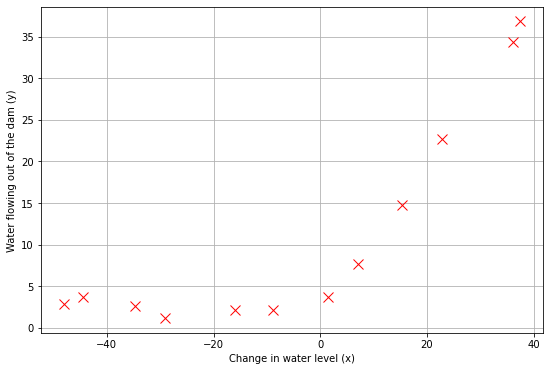

In [5]:
plotData(X,y)

In [6]:
def linearRegCostFunction(X,y,theta,lamda):
    m = len(y)
    theta_reg = np.zeros((theta.shape[0],theta.shape[1]))
    theta_reg[1:,:] = theta[1:,:]
    h = np.dot(X,theta)
    error = h-y
    J = 1/(2*m)*(np.dot(error.T,error)) + lamda/(2*m)*np.sum(theta_reg**2)
    grad = np.zeros(theta.shape)
    grad = 1/m*(np.dot(X.T,error)) + lamda/m*np.sum(theta_reg)
    grad.flatten()
    return (J,grad)

In [7]:
initial_theta = np.array([[1],[1]])
#print(theta[1:,:])
Xinput = np.append(np.ones((m,1)),X,axis=1)
J,grad = linearRegCostFunction(Xinput, y, initial_theta, 1);
print(J)
print(grad)


[[303.99319222]]
[[-15.21968234]
 [598.25074417]]


In [8]:
def sigmoid(z):
    #1/(1+exp(-z))
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1/(1+np.exp(-z))
    return g

In [9]:
def gradientDescentReg(x,y,alpha,theta,num_iters,lamda):
    m= len(y)
    j_history=[]
    for i in range(num_iters):
        j,g = linearRegCostFunction(x,y,theta,lamda)
        theta = theta -alpha*g
        j_history.append(j)
        
    return theta,j_history

In [10]:
ld=0
theta,J_history = gradientDescentReg(Xinput,y,0.001,initial_theta,4000,ld)
print(theta)

[[12.83833648]
 [ 0.36628247]]


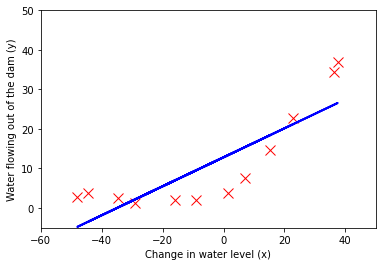

In [11]:
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plt.plot(X,np.dot(Xinput,theta),'b-',linewidth=2)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.axis([-60,50,-5,50])
plt.show()

# This ain't a good fit(Hence the model maybe wrong)

In [12]:
def learningCurve(X,y,Xval,yval,lamda):
    m = len(y)
    error_train = np.zeros((m,1))
    error_val   = np.zeros((m,1))
    for i in range(1,m+1):
        Xi = X[0:i,:]
        yi = y[0:i,:]
        initial_theta = np.zeros((Xi.shape[1],1))
        theta,j_history = gradientDescentReg(Xi,yi,0.001,initial_theta,3000,lamda)
        j,grad = linearRegCostFunction(Xi,yi,theta,0)
        error_train[i-1] = j
        jcv,gradcv = linearRegCostFunction(Xval,yval,theta,0)
        error_val[i-1] = jcv
        
    return (error_train,error_val)   

In [13]:
print(X[0:5,:])

[[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]]


# Training Examples	Train Error	Cross Validation Error

1 [9.86076132e-32] [205.12109575]
2 [0.26667458] [164.25356055]
3 [3.54818564] [45.54817577]
4 [3.18748894] [50.52763122]
5 [13.54362451] [33.88189168]
6 [19.77082269] [33.33501764]
7 [20.35490054] [32.44949026]
8 [18.49136793] [30.89743482]
9 [22.86492663] [32.09291116]
10 [23.62456104] [29.65401403]
11 [24.60460849] [30.89007392]
12 [22.62043727] [30.55405372]


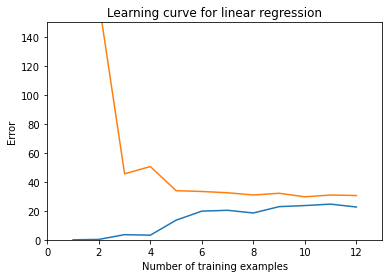

In [14]:
lamda=0
Xval_inp = np.append(np.ones((Xval.shape[0],1)),Xval,axis=1)
error_train, error_val = learningCurve(Xinput, y,Xval_inp, yval,lamda);
x = np.arange(1,m+1,1)
plt.plot(x,error_train,x,error_val)
plt.title('Learning curve for linear regression')
#plt.legend('Train', 'Cross Validation')
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0,13,0,150])
print('# Training Examples\tTrain Error\tCross Validation Error\n');
for i in range(1,m+1):
    print(i, error_train[i-1], error_val[i-1])

# Creating polynomial features

In [15]:
def polyFeatures(X,p):
    temp =X
    Xp=X
    Xp = np.reshape(Xp,(X.shape[0],X.shape[1]))
    for i in range(p-1):
        temp = np.multiply(temp,X)
        Xp=np.hstack((Xp,temp))
    
    return Xp
    

In [16]:
def featureNormalize(X):
    mu    = np.mean(X,axis=0)
    sigma = np.std( X,axis=0)
    X_Norm = np.divide(X-mu,sigma)
    return (X_Norm,mu,sigma)

In [17]:
p=8
X_p = polyFeatures(X,p)
X_p,mu,sigma = featureNormalize(X_p)
#print(X_p.shape)
X_poly = np.hstack((np.ones((X_p.shape[0],1)),X_p))
print(X_poly.shape)

(12, 9)


In [18]:
X_t = polyFeatures(Xtest,p)
X_t = np.divide(X_t-mu,sigma)
X_test = np.hstack((np.ones((X_t.shape[0],1)),X_t))
X_v = polyFeatures(Xval,p)
X_v = np.divide(X_v-mu,sigma)
X_val = np.hstack((np.ones((X_v.shape[0],1)),X_v))
print(X_test.shape)
print(X_val.shape)

(21, 9)
(21, 9)


In [19]:
lamda=1
initial_theta = np.zeros((p+1,1))
theta,j_history = gradientDescentReg(X_poly,y,0.3,initial_theta,20000,lamda)

In [20]:
def plotFit(xmin,xmax,mu,sigma,theta,p):
    x = np.arange(xmin-15,xmax+25,0.05).reshape((-1,1))
    x_p = polyFeatures(x,p)
    x_p = np.divide(x_p-mu,sigma)
    x_p = np.hstack((np.ones((x_p.shape[0],1)),x_p))
    plt.plot(x,np.dot(x_p,theta),'b--',lw=2)

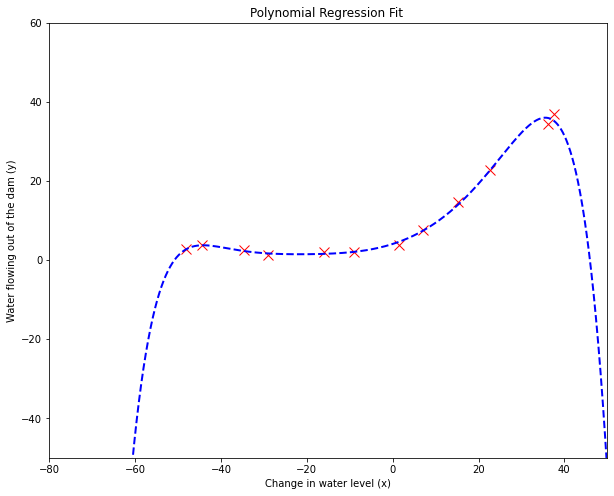

In [21]:
plt.figure(figsize=(10,8))
plt.plot(X, y, 'rx', markersize=10, linewidth=1.5)
plotFit(np.min(X), np.max(X), mu, sigma,theta, p)
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
plt.title ('Polynomial Regression Fit ')
plt.axis([-80,50,-50,60])
plt.show()

(0.0, 13.0, 0.0, 100.0)

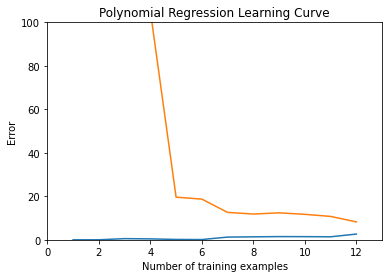

In [22]:
lamda=0
error_train, error_val = learningCurve(X_poly, y, X_val, yval, lamda)
xi = np.arange(1,m+1,1)
plt.plot(xi, error_train, xi, error_val)
plt.title('Polynomial Regression Learning Curve' )
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0,13,0,100])
#plt.legend('Train', 'Cross Validation')

# Choosing appropriate lamda

In [31]:
def validationCurve(X_poly,y,X_val,yval):
    lamda_vec = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]).reshape((-1,1))
    error_val = np.zeros((lamda_vec.shape[0],1))
    error_train = np.zeros((lamda_vec.shape[0],1))
    lamda_optim=1
    Jcv_compare=5000000
    Jtest = 5000000
    for i in range(len(lamda_vec)):
        initial_theta = np.zeros((X_poly.shape[1],1))
        theta,j_history = gradientDescentReg(X_poly,y,0.002,initial_theta,4000,lamda_vec[i])
        J,grad = linearRegCostFunction(X_poly, y, theta, 0)
        Jcv,gradcv = linearRegCostFunction(X_val, yval, theta, 0)
        error_val[i] = Jcv        
        error_train[i] = J
        temp = Jcv.item()
        if(temp<=Jcv_compare):
            lamda_optim = lamda_vec[i]
            Jcv_compare=temp
    
    
    return (lamda_vec,error_train,error_val,lamda_optim)   

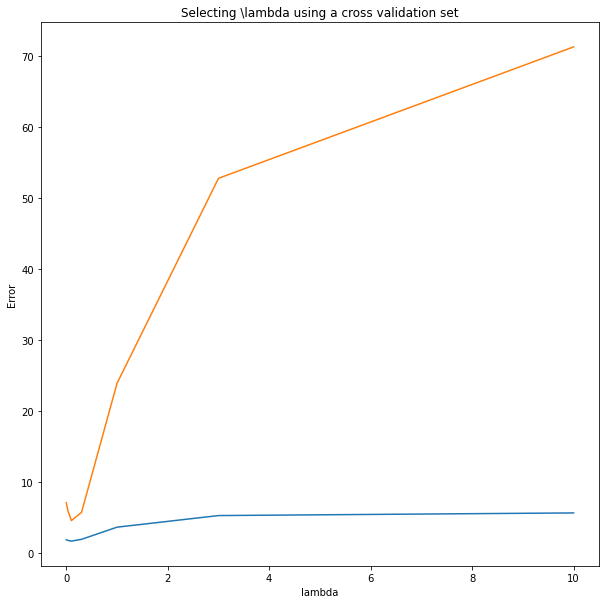

[0.1]


In [32]:
(lamda_vec,error_train,error_val,lamda_optim) = validationCurve(X_poly,y,X_val,yval)
plt.figure(figsize=(10,10))
plt.plot(lamda_vec,error_train,lamda_vec,error_val)
plt.title('Selecting \lambda using a cross validation set')
#plt.legend(['Train', 'Cross Validation'])
plt.xlabel('lambda')
plt.ylabel('Error')
plt.show()
print(lamda_optim)


# Best lambda??

In [33]:
print(lamda_optim)

[0.1]


In [34]:
optim_theta,j_history = gradientDescentReg(X_poly,y,0.003,initial_theta,3000,lamda_optim)
Jtest,gradtest = linearRegCostFunction(X_test, ytest, optim_theta, 0)
print(Jtest)

[[3.56431899]]


# Randomly selecting training and testing examples for learning curves

In [35]:
def learningCurveRandom(X,y,Xval,yval,lamda):
    m = len(y)
    error_train = np.zeros((m,1))
    error_val   = np.zeros((m,1))
    for i in range(1,m+1):
        idx =np.random.randint(m,size=i)
        Xi = X[idx,:]
        yi = y[idx,:]
        initial_theta = np.zeros((Xi.shape[1],1))
        theta,j_history = gradientDescentReg(Xi,yi,0.001,initial_theta,3000,lamda)
        j,grad = linearRegCostFunction(Xi,yi,theta,0)
        error_train[i-1] = j
        jcv,gradcv = linearRegCostFunction(Xval,yval,theta,0)
        error_val[i-1] = jcv
        
    return (error_train,error_val)   
    

(0.0, 14.0, 0.0, 150.0)

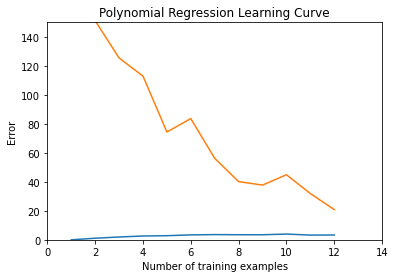

In [36]:
error_train = np.zeros((X_poly.shape[0],1))
error_val = np.zeros((X_poly.shape[0],1))
for b in range(50):
    et,ev = learningCurveRandom(X_poly,y,X_val,yval,0.01)
    error_train  = error_train + et
    error_val = error_val + ev

error_train = np.divide(error_train,50)
error_val = np.divide(error_val,50)
xi = np.arange(1,m+1,1)
plt.plot(xi, error_train, xi, error_val)
plt.title('Polynomial Regression Learning Curve' )
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.axis([0,14,0,150])


# End of Exercise